In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import math
import itertools
import numpy as np

import utils

git_root_path = utils.get_git_root(os.getcwd())
viz_root_path = os.path.join(git_root_path, utils.VIZ_DIR_NAME)
data_path = os.path.join(git_root_path, utils.DATA_DIR_NAME)

training_csv_path = os.path.join(data_path, utils.TRAINING_FILENAME + "-w-accuracy-cols." + utils.INPUT_DATA_FORMAT)
training_df = pd.read_csv(training_csv_path, sep = ";")
training_df["timestamp"] = pd.to_datetime(training_df["timestamp"])

In [2]:
cleaned_training_df = training_df
site = 1
cleaned_site_df = cleaned_training_df[cleaned_training_df["site_id"] == site]

In [3]:
cleaned_training_df

,timestamp,site_id,period_id,actual_consumption,actual_pv,price_buy_00,load_forecast_error_00_nominal,pv_forecast_error_00_nominal,load_forecast_error_00_perc,pv_forecast_error_00_perc,...,load_forecast_error_07_perc,pv_forecast_error_07_perc,load_forecast_error_08_nominal,pv_forecast_error_08_nominal,load_forecast_error_08_perc,pv_forecast_error_08_perc,load_forecast_error_09_nominal,pv_forecast_error_09_nominal,load_forecast_error_09_perc,pv_forecast_error_09_perc
0,2015-07-10 16:30:00,7,2,294.708363,1661.359837,0.049,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-10 16:45:00,7,2,320.276669,1551.160875,0.049,-16.126748,30.862527,-0.050353,0.019896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-10 17:00:00,7,2,293.362663,1429.188787,0.049,27.934109,-94.472790,0.095220,-0.066102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-10 17:15:00,7,2,283.942761,1296.463538,0.049,5.662239,21.003895,0.019941,0.016201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-10 17:30:00,7,2,304.128265,1155.771712,0.049,-10.934541,6.677431,-0.035954,0.005777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-10 17:45:00,7,2,401.018686,1005.393937,0.049,-90.068730,-11.120946,-0.224600,-0.011061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-10 18:00:00,7,2,495.217707,851.589938,0.049,-138.432358,21.853423,-0.279538,0.025662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-07-10 18:15:00,7,2,473.686502,688.205962,0.049,-64.365683,31.359538,-0.135882,0.045567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-07-10 18:30:00,7,2,283.942761,510.878812,0.049,60.221374,24.811137,0.212090,0.048566,...,0.029095,0.034812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-07-10 18:45:00,7,2,283.942761,327.351675,0.049,-62.284369,28.252416,-0.219355,0.086306,...,0.007305,0.088641,2.074269,29.016929,0.007305,0.088641,NaN,NaN,NaN,NaN


In [6]:
2 % 2

0

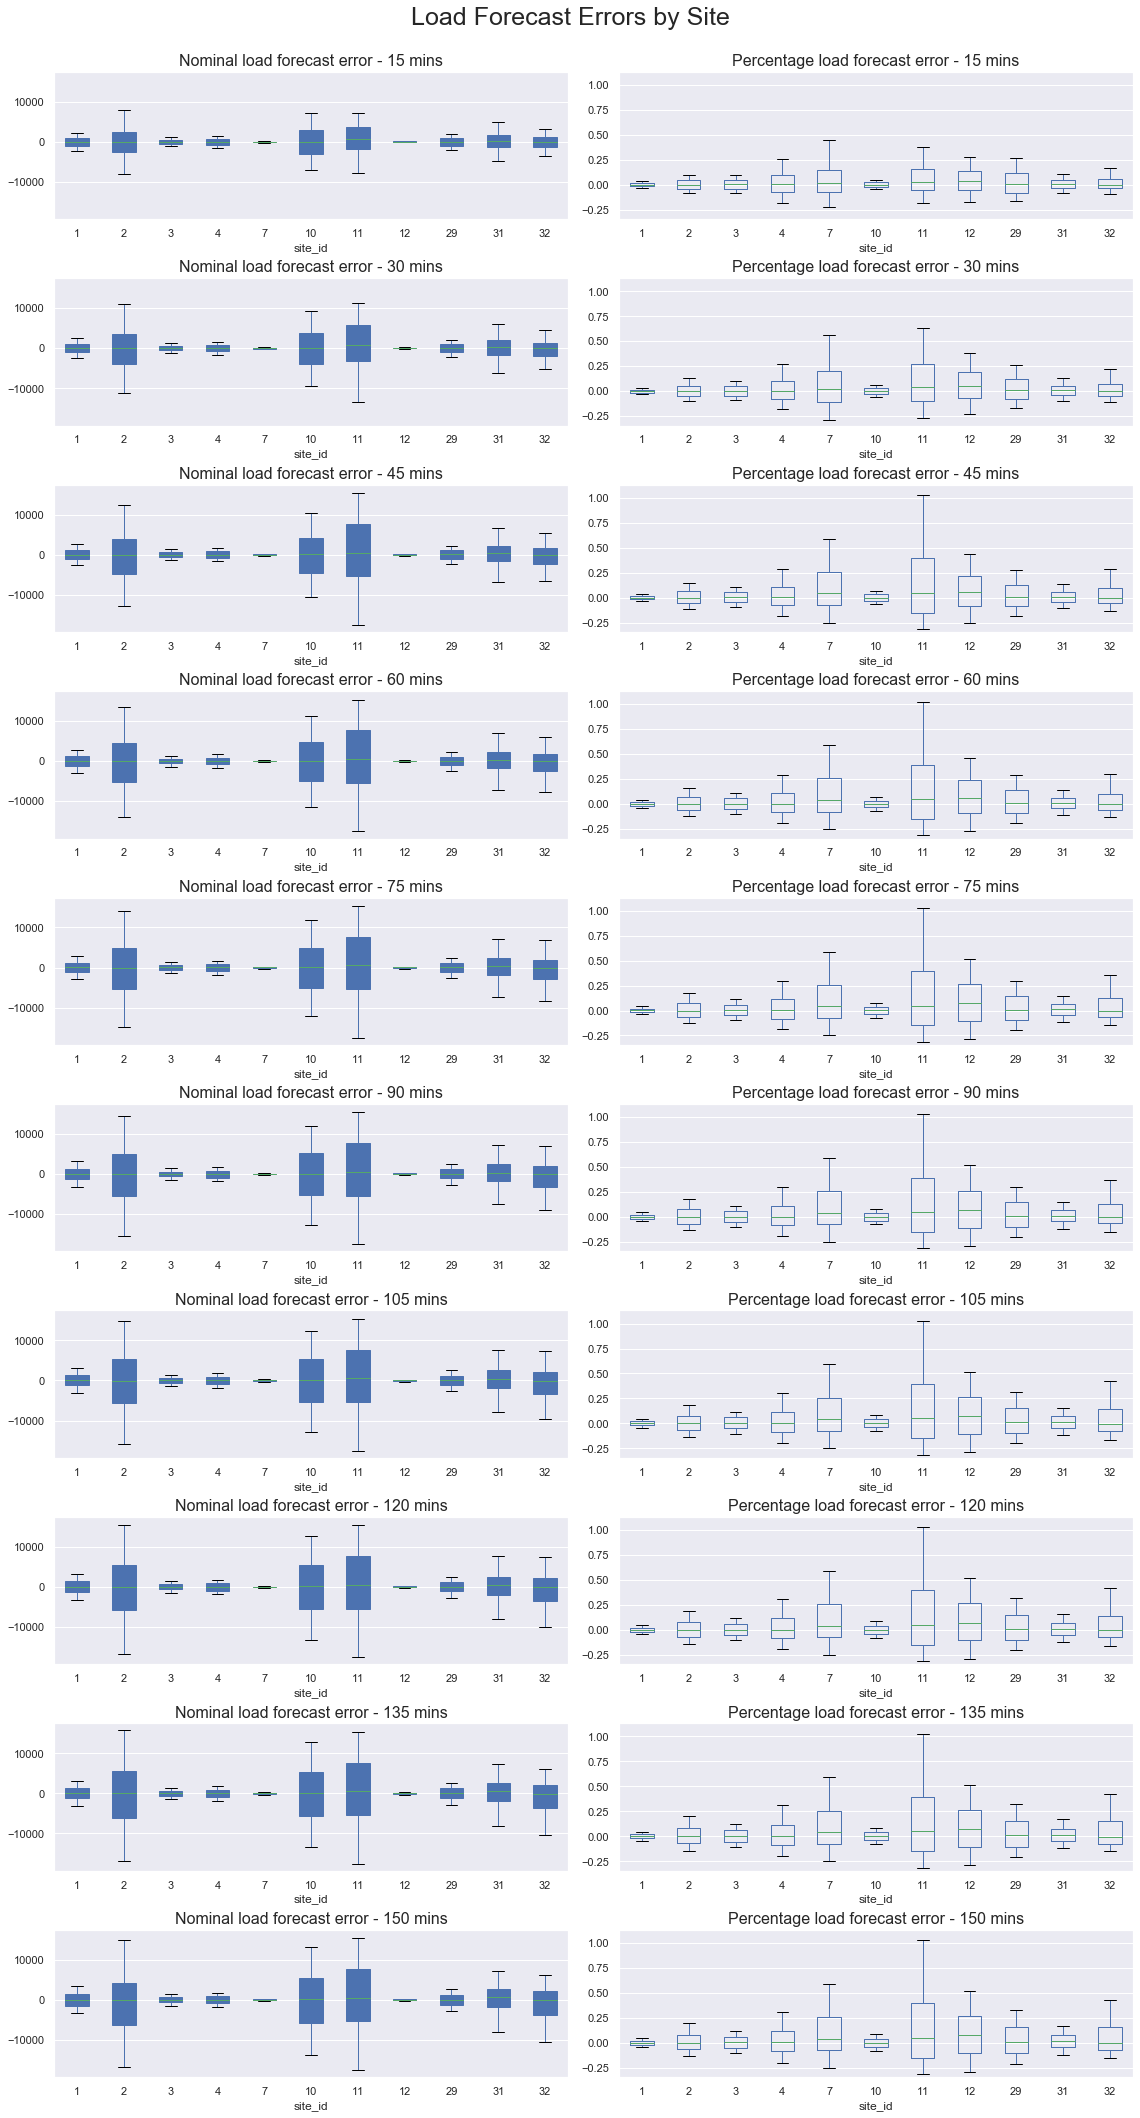

In [37]:
min_perc_whisker = 10
max_perc_whisker = 90

sns.set(rc={'figure.figsize':(16, 30)})
def plot_all_sites(subplot, df, cols, ymin, ymax, title, fill=True):
    
    boxplot_xticks = ["{} mins".format((i + 1)* 15) for i in range(0, 10)]
    
    df.boxplot(by='site_id', column = cols, whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=fill)
    
    return

def get_axis_lim(df, max_or_min, perc_or_nom, col_substr, group_by_site_id = False):
    
    min_perc_whisker = 10
    max_perc_whisker = 90
    
    max_or_min_types = ['max', 'min']
    if max_or_min not in max_or_min_types:
        raise ValueError("Invalid max_or_min arg. Expected one of: {}".format(max_or_min_types))
    
    perc_or_nom_types = ["nominal", "perc"]
    if perc_or_nom not in perc_or_nom_types:
        raise ValueError("Invalid perc_or_nom arg. Expected one of: {}".format(perc_or_nom_types))
    
    whisker_lim = min_perc_whisker if max_or_min == "min" else max_perc_whisker
    
    cols = [col for col in df.columns if perc_or_nom in col and col_substr in col]
    if group_by_site_id == True:
        grp_by_df = df.groupby("site_id")[cols].quantile((whisker_lim / 100.)) #.max().max()
        
        ax_lim = grp_by_df.max().max() if max_or_min == "max" else grp_by_df.min().min()
    
    ax_lim = ax_lim + (.1 * ax_lim) if max_or_min == "max" else ax_lim - abs(.1 * ax_lim)
    
    return ax_lim

load_nom_y_min = get_axis_lim(cleaned_training_df, "min", "nominal", "load_forecast_error", True)
load_nom_y_max = get_axis_lim(cleaned_training_df, "max", "nominal", "load_forecast_error", True)
load_perc_y_min = get_axis_lim(cleaned_training_df, "min", "perc", "load_forecast_error", True) 
load_perc_y_max = get_axis_lim(cleaned_training_df, "max", "perc", "load_forecast_error", True) 

num_plots = 10
fig, axes = plt.subplots(num_plots,2)

for i in range(0,num_plots):

    nom_axis = axes.flatten()[i*2]
    nom_axis.set_ylim([load_nom_y_min,load_nom_y_max])
    cleaned_training_df.boxplot(by='site_id', ax=nom_axis, column = ["load_forecast_error_0{}_nominal".format(i)], whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=True)
    nom_axis.xaxis.grid(False)
    nom_axis.set_title("Nominal load forecast error - {} mins".format((i + 1)* 15), fontsize=16)
    
    perc_axis = axes.flatten()[(i*2)+1]
    perc_axis.set_ylim([load_perc_y_min, load_perc_y_max])
    cleaned_training_df.boxplot(by='site_id', ax=perc_axis, column = ["load_forecast_error_0{}_perc".format(i)], whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=False)
    perc_axis.xaxis.grid(False)
    perc_axis.set_title("Percentage load forecast error - {} mins".format((i + 1)* 15), fontsize=16)
plt.suptitle("Load Forecast Errors by Site", fontsize=25)
#plt.title("Boxplots bounded at {} / {}".format(min_perc_whisker, max_perc_whisker))
plt.tight_layout()
fig.subplots_adjust(top = 0.95, hspace=0.4)
plt.show()


# pv_nom_y_min = get_axis_lim(cleaned_training_df, "min", "nominal", "pv_forecast_error", True)
# pv_nom_y_max = get_axis_lim(cleaned_training_df, "max", "nominal", "pv_forecast_error", True)
# pv_perc_y_min = get_axis_lim(cleaned_training_df, "min", "perc", "pv_forecast_error", True)
# pv_perc_y_max = get_axis_lim(cleaned_training_df, "max", "perc", "pv_forecast_error", True)

# fig, axes = plt.subplots(num_plots,2)

# for i in range(0,num_plots):
#     nom_axis = axes.flatten()[i*2]
#     nom_axis.set_ylim([pv_nom_y_min,pv_nom_y_max])
#     cleaned_training_df.boxplot(by='site_id', ax=nom_axis, column = ["pv_forecast_error_0{}_nominal".format(i)], whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=True)
#     nom_axis.set_title("Nominal PV forecast error - {} mins".format((i + 1)* 15))
    
#     perc_axis = axes.flatten()[(i*2)+1]
#     perc_axis.set_ylim([pv_perc_y_min, pv_perc_y_max])
#     cleaned_training_df.boxplot(by='site_id', ax=perc_axis, column = ["pv_forecast_error_0{}_perc".format(i)], whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=False)
#     perc_axis.set_title("Percentage PV forecast error - {} mins".format((i + 1)* 15))


In [ ]:
# sns.set(rc={'figure.figsize':(20, 13)})

# min_perc_whisker = 10
# max_perc_whisker = 90

# nom_cols = [col for col in cleaned_site_df.columns if "nominal" in col]
# nom_y_max = cleaned_site_df[nom_cols].quantile((max_perc_whisker / 100.)).max()
# nom_y_max = nom_y_max + (.1 * nom_y_max)
# nom_y_min = cleaned_site_df[nom_cols].quantile((min_perc_whisker / 100.)).min()
# nom_y_min = nom_y_min - abs(.1 * nom_y_min)

# perc_cols = [col for col in cleaned_site_df.columns if "perc" in col]
# perc_y_max = cleaned_site_df[perc_cols].quantile((max_perc_whisker / 100.)).max()
# perc_y_max = perc_y_max + (.1 * perc_y_max)
# perc_y_min = cleaned_site_df[perc_cols].quantile((min_perc_whisker / 100.)).min()
# perc_y_min = perc_y_min - abs(.1 * perc_y_min)

# def plot_df(subplot, df, ymin, ymax, title, fill=True):
    
#     boxplot_xticks = ["{} mins".format((i + 1)* 15) for i in range(0, 10)]
    
#     df.boxplot(whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=fill)
#     subplot.xaxis.grid(False)
#     subplot.xaxis.grid(False)
#     subplot.set_ylim([ymin,ymax])
#     plt.xticks([i for i in range(1,11)], boxplot_xticks)
    
#     subplot.set_title(title, fontsize=18)
#     subplot.get_figure()
    
#     return
    
# fig = plt.figure()
# plt.suptitle("Site {}".format(site), fontsize=25)

# load_nom_boxplot = fig.add_subplot(4, 1, 1)
# print("plotting figure")
# load_nom_cols = [col for col in cleaned_site_df if "load_forecast" in col and "nominal" in col]
# plot_df(load_nom_boxplot, cleaned_site_df[load_nom_cols], nom_y_min, nom_y_max, 'Load forecast error (W)', False)

# pv_nom_boxplot = fig.add_subplot(4, 1, 2)
# pv_nom_cols = [col for col in cleaned_site_df if "pv_forecast" in col and "nominal" in col]
# plot_df(pv_nom_boxplot, cleaned_site_df[pv_nom_cols], nom_y_min, nom_y_max, 'PV forecast error (W)')

# load_perc_boxplot = fig.add_subplot(4, 1, 3)
# load_perc_cols = [col for col in cleaned_site_df if "load_forecast" in col and "perc" in col]
# plot_df(load_perc_boxplot, cleaned_site_df[load_perc_cols], perc_y_min, perc_y_max, 'Load forecast error (%)', False)

# pv_perc_boxplot = fig.add_subplot(4, 1, 4)
# pv_perc_cols = [col for col in cleaned_site_df if "pv_forecast" in col and "perc" in col]
# plot_df(pv_perc_boxplot, cleaned_site_df[pv_perc_cols], perc_y_min, perc_y_max, 'PV forecast error (%)')
# # load_nom_boxplot = cleaned_site_df[load_nom_cols].boxplot(whis= [min_perc_whisker, max_perc_whisker],showfliers=False)
# # load_nom_boxplot.xaxis.grid(False)
# # load_nom_boxplot.set_ylim([nom_y_min,nom_y_max])
# # plt.xticks([i for i in range(1,11)], boxplot_xticks)
# # load_nom_boxplot.set_title('Load forecast error (W)', fontsize=18)
# # load_nom_boxplot = load_nom_boxplot.get_figure()

# #load_perc_boxplot = cleaned_site_df[load_perc_cols].boxplot(showfliers=False)
# #plt.xticks([i for i in range(1,11)], boxplot_xticks)
# #load_perc_boxplot.set_title('Load forecast error (%)', fontsize=18)
# #load_perc_boxplot = load_perc_boxplot.get_figure()


# # pv_nom_boxplot = cleaned_site_df[pv_nom_cols].boxplot(showfliers=False , whis= [min_perc_whisker, max_perc_whisker], patch_artist=True)
# # plt.xticks([i for i in range(1,11)], boxplot_xticks)
# # pv_nom_boxplot.set_ylim([nom_y_min,nom_y_max])
# # pv_nom_boxplot.set_title('PV forecast error (W)', fontsize=18)
# # pv_nom_boxplot = pv_nom_boxplot.get_figure()



# # pv_perc_boxplot = cleaned_site_df[pv_perc_cols].boxplot(showfliers=False, patch_artist=True)
# # plt.xticks([i for i in range(1,11)], boxplot_xticks)
# # pv_perc_boxplot.set_title('PV forecast error (%)', fontsize=18)
# # pv_perc_boxplot = pv_perc_boxplot.get_figure()

# print("saving figure")
# plt.tight_layout()
# fig.subplots_adjust(top = 0.92, hspace=0.3)
# fig.savefig("./test.png")
# plt.show()
# plt.close(fig)

In [ ]:
# sites = training_df["site_id"].unique()
# site = 1 # for site in sites:
# site_df = training_df[training_df["site_id"] == site]
# site_df = site_df.sort_values("timestamp")
# #site_df = site_df.set_index("timestamp")

# periods = site_df["period_id"].unique()

# def my_func(predicted_val, true_val):

#     return_val = predicted_val - true_val
    
#     return return_val

# sns.set(rc={'figure.figsize':(20, 10)})

# cleaned_site_df = pd.DataFrame()
# for period in periods:
#     period_df = site_df[site_df["period_id"] == period].reset_index(drop=True)
#     period_df["period_idx"] = period_df.index
#     period_df = period_df.set_index(["timestamp"])
# #     period_df_cols = list(itertools.chain.from_iterable([["period_idx"], [col for col in period_df.columns if col != "period_idx"]]))
# #     period_df[period_df_cols]
    
#     for i in range(0, 10):
#         print(i)
#         period_df["load_forecast_error_0{}_nominal".format(i)] = period_df.apply(lambda row: my_func(\
#             period_df[period_df["period_idx"] == int(row["period_idx"]) - 1 - i]["load_0{}".format(i)].values[0],\
#             row["actual_consumption"])\
#             if row["period_idx"] > i else None, \
#             axis= 1)

#         period_df["pv_forecast_error_0{}_nominal".format(i)] = period_df.apply(lambda row: my_func(\
#             period_df[period_df["period_idx"] == int(row["period_idx"]) - 1 - i]["pv_0{}".format(i)].values[0],\
#             row["actual_pv"])\
#             if row["period_idx"] > i else None, \
#             axis= 1)

#         period_df["load_forecast_error_0{}_perc".format(i)] = period_df["load_forecast_error_0{}_nominal".format(i)] / period_df["actual_consumption"]
#         period_df["pv_forecast_error_0{}_perc".format(i)] = period_df["pv_forecast_error_0{}_nominal".format(i)] / period_df["actual_pv"]
    
#     period_df = period_df.replace(np.nan, 0)
#     period_df = period_df.replace([np.inf, -np.inf], np.nan)
    
#     cleaned_site_df = cleaned_site_df.append(period_df)
    #raise ValueError("")
# data = [weekly_df["load_forecast_error_00_nominal"], weekly_df["load_forecast_error_09_nominal"]]
# fig, ax = plt.subplots()
# ax.set_title('Multiple Samples with Different sizes')
# ax.boxplot(weekly_df["load_forecast_error_00_nominal"], showfliers=False)



In [ ]:
#period_df = period_df.replace(np.nan, 0)
#period_df = period_df.replace([np.inf, -np.inf], np.nan)
boxplot_xticks = ["{} mins".format((i + 1)* 15) for i in range(0, 10)]
boxplot_xticks

In [ ]:
sns.set(rc={'figure.figsize':(20, 13)})

min_perc_whisker = 10
max_perc_whisker = 90

nom_cols = [col for col in cleaned_site_df.columns if "nominal" in col]
nom_y_max = cleaned_site_df[nom_cols].quantile((max_perc_whisker / 100.)).max()
nom_y_max = nom_y_max + (.1 * nom_y_max)
nom_y_min = cleaned_site_df[nom_cols].quantile((min_perc_whisker / 100.)).min()
nom_y_min = nom_y_min - abs(.1 * nom_y_min)

perc_cols = [col for col in cleaned_site_df.columns if "perc" in col]
perc_y_max = cleaned_site_df[perc_cols].quantile((max_perc_whisker / 100.)).max()
perc_y_max = perc_y_max + (.1 * perc_y_max)
perc_y_min = cleaned_site_df[perc_cols].quantile((min_perc_whisker / 100.)).min()
perc_y_min = perc_y_min - abs(.1 * perc_y_min)

def plot_df(subplot, df, ymin, ymax, title, fill=True):
    
    boxplot_xticks = ["{} mins".format((i + 1)* 15) for i in range(0, 10)]
    
    df.boxplot(whis= [min_perc_whisker, max_perc_whisker],showfliers=False, patch_artist=fill)
    subplot.xaxis.grid(False)
    subplot.xaxis.grid(False)
    subplot.set_ylim([ymin,ymax])
    plt.xticks([i for i in range(1,11)], boxplot_xticks)
    
    subplot.set_title(title, fontsize=18)
    subplot.get_figure()
    
    return
    
fig = plt.figure()
plt.suptitle("Site {}".format(site), fontsize=25)

load_nom_boxplot = fig.add_subplot(4, 1, 1)
print("plotting figure")
load_nom_cols = [col for col in cleaned_site_df if "load_forecast" in col and "nominal" in col]
plot_df(load_nom_boxplot, cleaned_site_df[load_nom_cols], nom_y_min, nom_y_max, 'Load forecast error (W)', False)

pv_nom_boxplot = fig.add_subplot(4, 1, 2)
pv_nom_cols = [col for col in cleaned_site_df if "pv_forecast" in col and "nominal" in col]
plot_df(pv_nom_boxplot, cleaned_site_df[pv_nom_cols], nom_y_min, nom_y_max, 'PV forecast error (W)')

load_perc_boxplot = fig.add_subplot(4, 1, 3)
load_perc_cols = [col for col in cleaned_site_df if "load_forecast" in col and "perc" in col]
plot_df(load_perc_boxplot, cleaned_site_df[load_perc_cols], perc_y_min, perc_y_max, 'Load forecast error (%)', False)

pv_perc_boxplot = fig.add_subplot(4, 1, 4)
pv_perc_cols = [col for col in cleaned_site_df if "pv_forecast" in col and "perc" in col]
plot_df(pv_perc_boxplot, cleaned_site_df[pv_perc_cols], perc_y_min, perc_y_max, 'PV forecast error (%)')
# load_nom_boxplot = cleaned_site_df[load_nom_cols].boxplot(whis= [min_perc_whisker, max_perc_whisker],showfliers=False)
# load_nom_boxplot.xaxis.grid(False)
# load_nom_boxplot.set_ylim([nom_y_min,nom_y_max])
# plt.xticks([i for i in range(1,11)], boxplot_xticks)
# load_nom_boxplot.set_title('Load forecast error (W)', fontsize=18)
# load_nom_boxplot = load_nom_boxplot.get_figure()

#load_perc_boxplot = cleaned_site_df[load_perc_cols].boxplot(showfliers=False)
#plt.xticks([i for i in range(1,11)], boxplot_xticks)
#load_perc_boxplot.set_title('Load forecast error (%)', fontsize=18)
#load_perc_boxplot = load_perc_boxplot.get_figure()


# pv_nom_boxplot = cleaned_site_df[pv_nom_cols].boxplot(showfliers=False , whis= [min_perc_whisker, max_perc_whisker], patch_artist=True)
# plt.xticks([i for i in range(1,11)], boxplot_xticks)
# pv_nom_boxplot.set_ylim([nom_y_min,nom_y_max])
# pv_nom_boxplot.set_title('PV forecast error (W)', fontsize=18)
# pv_nom_boxplot = pv_nom_boxplot.get_figure()



# pv_perc_boxplot = cleaned_site_df[pv_perc_cols].boxplot(showfliers=False, patch_artist=True)
# plt.xticks([i for i in range(1,11)], boxplot_xticks)
# pv_perc_boxplot.set_title('PV forecast error (%)', fontsize=18)
# pv_perc_boxplot = pv_perc_boxplot.get_figure()

print("saving figure")
plt.tight_layout()
fig.subplots_adjust(top = 0.92, hspace=0.3)
fig.savefig("./test.png")
plt.show()
plt.close(fig)


# ,
#             ,
#             capprops=dict(color=c),
#             whiskerprops=dict(color=c),
#             flierprops=dict(color=c, markeredgecolor=c),
#             medianprops=dict(color=c),
#             )

In [ ]:
cleaned_site_df[nom_cols].quantile(0.9).max()
# cleaned_site_df[[
#     "actual_pv", "pv_forecast_error_00_nominal", #"pv_forecast_error_01_nominal", "pv_forecast_error_02_nominal",
#     "pv_forecast_error_00_perc", #"pv_forecast_error_01_perc", "pv_forecast_error_02_perc"
#     "pv_00"
# ]]

In [ ]:
def my_func(predicted_val, true_val):

    return_val = predicted_val - true_val
    
    return return_val

for i in range(0, 10):
    print(i)
    period_df["load_forecast_error_0{}_nominal".format(i)] = period_df.apply(lambda row: my_func(\
        period_df[period_df["period_idx"] == int(row["period_idx"]) - 1 - i]["load_0{}".format(i)].values[0],\
        row["actual_consumption"])\
        if row["period_idx"] > i else None, \
        axis= 1)
    
    period_df["pv_forecast_error_0{}_nominal".format(i)] = period_df.apply(lambda row: my_func(\
        period_df[period_df["period_idx"] == int(row["period_idx"]) - 1 - i]["pv_0{}".format(i)].values[0],\
        row["actual_pv"])\
        if row["period_idx"] > i else None, \
        axis= 1)
    
    period_df["load_forecast_error_0{}_perc".format(i)] = period_df["load_forecast_error_0{}_nominal".format(i)] / period_df["actual_consumption"]
    period_df["pv_forecast_error_0{}_perc".format(i)] = period_df["pv_forecast_error_0{}_nominal".format(i)] / period_df["actual_pv"]
    #period_df_cols = list(itertools.chain.from_iterable([["period_idx", "forecast_error"], [col for col in period_df.columns if col != "period_idx"]]))
#period_df[period_df_cols]
#my_func(row["load_00"],
    #period_df[period_df["period_idx"] == int(row["period_idx"]) + 1]["actual_consumption"].values[0]))

In [ ]:
period_df[["actual_consumption", "load_forecast_error_00_nominal", "load_00", "load_forecast_error_00_perc"]]
#period_df["forecast_error"].describe()

In [ ]:

print("-- period ID {}".format(period))

In [ ]:
num_weeks = math.ceil((max(period_df.index) - min(period_df.index)).days / 7)
start_timestamp = min(period_df.index)
fig_height = 4 * num_weeks
sns.set(rc={'figure.figsize':(14, fig_height)})

fig = plt.figure()

for i in range(1, num_weeks + 1):
    start_dt_str = start_timestamp.strftime('%m-%d-%Y')
    end_dt_str = (start_timestamp + timedelta(days=7)).strftime('%m-%d-%Y')
    weekly_df = period_df[(period_df.index >= start_timestamp) \
        & (period_df.index < start_timestamp + timedelta(days=7))]

    weekly_plot = fig.add_subplot(num_weeks, 1, i)
    weekly_plot = plt.plot('load_forecast_error_00_nominal', data=weekly_df, linewidth=1, label="0-15")
    weekly_plot = plt.plot('load_forecast_error_09_nominal', data=weekly_df, linewidth=1, label="150-165")
    weekly_plot = plt.plot('actual_consumption', data=weekly_df, linewidth=1, label="Load")
    weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    weekly_plot = plt.title("Site ID: {site} / Period ID: {period} \n{start_dt_str} - {end_dt_str}".format(**locals()))
    fig.subplots_adjust(hspace = 0.5)
    del(weekly_plot)

    start_timestamp = start_timestamp + timedelta(days=7)

fig.show()

#fig.subplots_adjust(top = 2.0)
# viz_dir = os.path.join(viz_root_path, "price", "Site {}".format(site), "")
# filename = "Period {}.png".format(period)
# if not os.path.exists(viz_dir):
#     os.makedirs(viz_dir)

# fig.savefig(os.path.join(viz_dir, filename))
# 

In [ ]:
sns.set(rc={'figure.figsize':(30, 10)})
# data = [weekly_df["load_forecast_error_00_nominal"], weekly_df["load_forecast_error_09_nominal"]]
# fig, ax = plt.subplots()
# ax.set_title('Multiple Samples with Different sizes')
# ax.boxplot(weekly_df["load_forecast_error_00_nominal"], showfliers=False)

fig = plt.figure()
load_cols = [col for col in period_df if "load_forecast" in col and "nominal" in col]
load_cols
period_df[load_cols].boxplot(showfliers=False)

In [ ]:
period_df = period_df.replace([np.inf, -np.inf], np.nan)
period_df["pv_forecast_error_00_perc"].dropna()

In [ ]:
period_df[["pv_forecast_error_00_perc", "pv_forecast_error_09_perc"]].boxplot(showfliers=False)